# Analisis Sentimen Aplikasi Quora Menggunakan Naive Bayes: Mengetahui Pandangan Pengguna Terhadap Aplikasi Quora

![quora](https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/Quora_logo.svg/2560px-Quora_logo.svg.png)

# 1. Pengambilan Data

## Scraping data
- Web scraping atau data scraping adalah proses mengambil data dari suatu website secara otomatis dengan menggunakan program atau bot. Pada tugas kali ini saya menggunakan library Google-Play-Scraper untuk melakukan scraping data ulasan aplikasi Quora di Google Play Store. 

- Menggunakan Google Colab proses scraping data di lakukan dan di unduh untuk dapat disimpan dalam format csv dengan nama "scrap_quora".

https://colab.research.google.com/drive/198bSgWK-bvhxHgwda2zvVfZftUPJnogf?usp=sharing

## Import pustaka yang digunakan

In [1]:
import pandas as pd #manipulasi data dan analisa data/dataframe
import numpy as np #untuk komputasi numerik

from nltk.corpus import stopwords #stopwords untuk menghilangkan kata-kata yang tidak relevan dalam teks
import re #regular experetion, mencari pola kata tertentu dalam string
import string #mempermudah manipulasi data text(hapus whitespace, tanda bas, dsb)

import nltk #memperoses pengelolaan text (Natural Language Toolkit)
stopwords_indonesia = stopwords.words('indonesian') #simpan stopword dalam variabel
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #stopword

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #stemming dengan algoritma Sastrawi

nltk.download('wordnet') #dari nltk untuk lemmatization
from nltk.stem import WordNetLemmatizer #lemmatization

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import dataset 

In [2]:
dataframe = pd.read_csv('scrap_quora.csv') #import dataset dan deskripsi ke dalam variabel baru
dataframe.head(10) #menampilkan 10 data teratas

,at,userName,score,content
0,2023-06-07 05:17:22,HD MQ,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...
1,2023-06-06 17:38:00,Fajar Hidayatullah,5,Pengguna quora sangat suportif. Bisa banyak am...
2,2023-06-05 12:25:16,Arief Ghozaly,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek..."
3,2023-05-27 22:59:47,Musaalkaff Fiii,1,Ada bug masih lambat kurang responsif
4,2023-05-26 21:46:39,Irfan Hidayat,5,Perlu pengembangan lagi aplikasi ini. Masa ada...
5,2023-05-25 01:46:36,Hasna Najihaturrahmi,5,"Keren, pertanyaan kita yg asal sesuai yg dipik..."
6,2023-05-24 03:15:24,Ikadian Yunita,5,"aplikasi ini sangat membantu saya, banyak orng..."
7,2023-05-22 10:07:58,yog blog,1,Setelah update aplikasi malah tidak bisa dibuk...
8,2023-05-15 05:08:56,Muhammad Nur Lubis,5,Bagus dan menarik alur yg diceritakan.. apalag...
9,2023-05-05 21:58:28,budiarti candra,5,Aplikasinya bagus dan banyak pengetahuan serta...


In [3]:
data = dataframe[['score','content']] #menyimpan 2 kolom saja ke dalam variabel data
data.head(5) #menampilkan 5 data teratas

,score,content
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek..."
3,1,Ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...


In [4]:
print('Jumlah data awal:',data['content'].count()) #cek jumlah data

Jumlah data awal: 1000


In [5]:
#Hapus record dengan missing value pada kolom ungkapan
df = data.copy()

df['content'] = df['content'].replace('', np.nan)
df = df.dropna(axis=0, subset=['content'])

df = df.reset_index()
del df['index'] #Hapus index sebelumnya

In [6]:
df.head(5)

,score,content
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek..."
3,1,Ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...


# 2. Text preprocessing

## Case folding

In [7]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
df['lwr'] = df['content'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
df.head(5)

,score,content,lwr
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek..."
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...


## Menghapus tanda baca

In [8]:
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
df['punct'] = df['lwr'].apply(clean_punct)
df.head(5)

,score,content,lwr,punct
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...


## Menghapus emotikon

In [9]:
def remove_emoticons(text):
    emoticons_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoticons_pattern.sub(r'', text)

df['emot'] = df['punct'].apply(lambda x: remove_emoticons(x))
df.head()

,score,content,lwr,punct,emot
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...


## Menghapus double atay lebih whitespace

In [10]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['double_ws'] = df['emot'].apply(_normalize_whitespace)
df.head(5)

,score,content,lwr,punct,emot,double_ws
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...


## Tokenizing

In [11]:
def tokenization(text):
    text = re.split('W+', text)
    return text
df['tokenization'] = df['double_ws'].apply(lambda x: tokenization(x.lower()))
df.head(5)

,score,content,lwr,punct,emot,double_ws,tokenization
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif]
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...


## Stop Removal

### Menggunakan nltk

In [12]:
stopword = nltk.corpus.stopwords.words('Indonesian')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
df['stop_removal'] = df['tokenization'].apply(remove_stopwords)
df.head(5)

,score,content,lwr,punct,emot,double_ws,tokenization,stop_removal
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...,[tolong dengarkan ini aplikasi kamu ada bug ya...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...,[pengguna quora sangat suportif bisa banyak am...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...,[kok bisa jaringan full wifi diganti2 eksekusi...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif],[ada bug masih lambat kurang responsif]
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...,[perlu pengembangan lagi aplikasi ini masa ada...


### Menggunakan sastrawi

In [13]:
df['stop_removal'] = df['stop_removal'].astype('str')

In [14]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df['sastra'] = df['stop_removal'].apply(lambda x: stopword.remove(x))
df.head()

,score,content,lwr,punct,emot,double_ws,tokenization,stop_removal,sastra
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...,['tolong dengarkan ini aplikasi kamu ada bug y...,['tolong dengarkan aplikasi kamu bug sangat me...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...,['pengguna quora sangat suportif bisa banyak a...,['pengguna quora sangat suportif banyak ambil ...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...,['kok bisa jaringan full wifi diganti2 eksekus...,['kok jaringan full wifi diganti2 eksekusi men...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif],['ada bug masih lambat kurang responsif'],['ada bug lambat kurang responsif']
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...,['perlu pengembangan lagi aplikasi ini masa ad...,['perlu pengembangan aplikasi masa beberapa fi...


### Menggunakan dataset

In [15]:
dataset = pd.read_csv('stopwordbahasa.csv')
def sw(text):
    return ' '.join(word for word in text.split() if len(word) not in dataset)

df['sw'] = df['sastra'].apply(lambda x: sw(x))

df.head(5)

,score,content,lwr,punct,emot,double_ws,tokenization,stop_removal,sastra,sw
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...,['tolong dengarkan ini aplikasi kamu ada bug y...,['tolong dengarkan aplikasi kamu bug sangat me...,['tolong dengarkan aplikasi kamu bug sangat me...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...,['pengguna quora sangat suportif bisa banyak a...,['pengguna quora sangat suportif banyak ambil ...,['pengguna quora sangat suportif banyak ambil ...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...,['kok bisa jaringan full wifi diganti2 eksekus...,['kok jaringan full wifi diganti2 eksekusi men...,['kok jaringan full wifi diganti2 eksekusi men...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif],['ada bug masih lambat kurang responsif'],['ada bug lambat kurang responsif'],['ada bug lambat kurang responsif']
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...,['perlu pengembangan lagi aplikasi ini masa ad...,['perlu pengembangan aplikasi masa beberapa fi...,['perlu pengembangan aplikasi masa beberapa fi...


## Menghapus kata yang kurang dari 3 huruf

In [16]:
#fungsi untuk menghapus kata yang kurang dari 3 huruf
def remove_short_words(text):
    return ' '.join(word for word in text.split() if len(word) > 3)

#menghapus kata yang kurang dari 3 huruf pada kolom 'text'
df['3letters'] = df['sw'].apply(lambda x: remove_short_words(x))

#menampilkan hasil
df.head(5)

,score,content,lwr,punct,emot,double_ws,tokenization,stop_removal,sastra,sw,3letters
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...,['tolong dengarkan ini aplikasi kamu ada bug y...,['tolong dengarkan aplikasi kamu bug sangat me...,['tolong dengarkan aplikasi kamu bug sangat me...,['tolong dengarkan aplikasi kamu sangat menjen...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...,['pengguna quora sangat suportif bisa banyak a...,['pengguna quora sangat suportif banyak ambil ...,['pengguna quora sangat suportif banyak ambil ...,['pengguna quora sangat suportif banyak ambil ...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...,['kok bisa jaringan full wifi diganti2 eksekus...,['kok jaringan full wifi diganti2 eksekusi men...,['kok jaringan full wifi diganti2 eksekusi men...,['kok jaringan full wifi diganti2 eksekusi men...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif],['ada bug masih lambat kurang responsif'],['ada bug lambat kurang responsif'],['ada bug lambat kurang responsif'],['ada lambat kurang responsif']
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...,['perlu pengembangan lagi aplikasi ini masa ad...,['perlu pengembangan aplikasi masa beberapa fi...,['perlu pengembangan aplikasi masa beberapa fi...,['perlu pengembangan aplikasi masa beberapa fi...


## Stemming

## Lemmatization

In [17]:
lemmatizer = WordNetLemmatizer()

def lemma(x):
    x = str(x)
    x = nltk.word_tokenize(x)
    x = [lemmatizer.lemmatize(word) for word in x]
    x = ' '.join(x)
    return x

df['lemma'] = df['3letters'].apply(lambda x: lemma(x))
df.head(10)

,score,content,lwr,punct,emot,double_ws,tokenization,stop_removal,sastra,sw,3letters,lemma
0,1,Tolong dengarkan ini Aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,tolong dengarkan ini aplikasi kamu ada bug yan...,[tolong dengarkan ini aplikasi kamu ada bug ya...,['tolong dengarkan ini aplikasi kamu ada bug y...,['tolong dengarkan aplikasi kamu bug sangat me...,['tolong dengarkan aplikasi kamu bug sangat me...,['tolong dengarkan aplikasi kamu sangat menjen...,[ 'tolong dengarkan aplikasi kamu sangat menje...
1,5,Pengguna quora sangat suportif. Bisa banyak am...,pengguna quora sangat suportif. bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak am...,pengguna quora sangat suportif bisa banyak amb...,[pengguna quora sangat suportif bisa banyak am...,['pengguna quora sangat suportif bisa banyak a...,['pengguna quora sangat suportif banyak ambil ...,['pengguna quora sangat suportif banyak ambil ...,['pengguna quora sangat suportif banyak ambil ...,[ 'pengguna quora sangat suportif banyak ambil...
2,1,"Kok bisa? Jaringan full + WIFI diganti2, eksek...","kok bisa? jaringan full + wifi diganti2, eksek...",kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 ekseku...,kok bisa jaringan full wifi diganti2 eksekusi ...,[kok bisa jaringan full wifi diganti2 eksekusi...,['kok bisa jaringan full wifi diganti2 eksekus...,['kok jaringan full wifi diganti2 eksekusi men...,['kok jaringan full wifi diganti2 eksekusi men...,['kok jaringan full wifi diganti2 eksekusi men...,[ 'kok jaringan full wifi diganti2 eksekusi me...
3,1,Ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,ada bug masih lambat kurang responsif,[ada bug masih lambat kurang responsif],['ada bug masih lambat kurang responsif'],['ada bug lambat kurang responsif'],['ada bug lambat kurang responsif'],['ada lambat kurang responsif'],[ 'ada lambat kurang responsif ' ]
4,5,Perlu pengembangan lagi aplikasi ini. Masa ada...,perlu pengembangan lagi aplikasi ini. masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada...,perlu pengembangan lagi aplikasi ini masa ada ...,[perlu pengembangan lagi aplikasi ini masa ada...,['perlu pengembangan lagi aplikasi ini masa ad...,['perlu pengembangan aplikasi masa beberapa fi...,['perlu pengembangan aplikasi masa beberapa fi...,['perlu pengembangan aplikasi masa beberapa fi...,[ 'perlu pengembangan aplikasi masa beberapa f...
5,5,"Keren, pertanyaan kita yg asal sesuai yg dipik...","keren, pertanyaan kita yg asal sesuai yg dipik...",keren pertanyaan kita yg asal sesuai yg dipiki...,keren pertanyaan kita yg asal sesuai yg dipiki...,keren pertanyaan kita yg asal sesuai yg dipiki...,[keren pertanyaan kita yg asal sesuai yg dipik...,['keren pertanyaan kita yg asal sesuai yg dipi...,['keren pertanyaan yg asal sesuai yg dipikirka...,['keren pertanyaan yg asal sesuai yg dipikirka...,['keren pertanyaan asal sesuai dipikirkan terj...,[ 'keren pertanyaan asal sesuai dipikirkan ter...
6,5,"aplikasi ini sangat membantu saya, banyak orng...","aplikasi ini sangat membantu saya, banyak orng...",aplikasi ini sangat membantu saya banyak orng ...,aplikasi ini sangat membantu saya banyak orng ...,aplikasi ini sangat membantu saya banyak orng ...,[aplikasi ini sangat membantu saya banyak orng...,['aplikasi ini sangat membantu saya banyak orn...,['aplikasi sangat membantu banyak orng baik me...,['aplikasi sangat membantu banyak orng baik me...,['aplikasi sangat membantu banyak orng baik me...,[ 'aplikasi sangat membantu banyak orng baik m...
7,1,Setelah update aplikasi malah tidak bisa dibuk...,setelah update aplikasi malah tidak bisa dibuk...,setelah update aplikasi malah tidak bisa dibuk...,setelah update

### Menyimpan data dalam variabel

In [18]:
data = df[['score','lemma']]
data.head()

,score,lemma
0,1,[ 'tolong dengarkan aplikasi kamu sangat menje...
1,5,[ 'pengguna quora sangat suportif banyak ambil...
2,1,[ 'kok jaringan full wifi diganti2 eksekusi me...
3,1,[ 'ada lambat kurang responsif ' ]
4,5,[ 'perlu pengembangan aplikasi masa beberapa f...


# 3. Pelabelan Sentimen

In [19]:
#Fungsi untuk melakukan pelabelan sentimen
def label_sentimen(score):
    if score > 3:
        return 'positif'
    elif score < 4:
        return 'negatif'

# Menerapkan fungsi pelabelan sentimen ke kolom 'score' dan menyimpannya dalam kolom 'sentimen'
data['sentimen'] = data['score'].apply(label_sentimen)

# Menampilkan DataFrame hasil
data.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_9968\3830138578.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen'] = data['score'].apply(label_sentimen)


,score,lemma,sentimen
0,1,[ 'tolong dengarkan aplikasi kamu sangat menje...,negatif
1,5,[ 'pengguna quora sangat suportif banyak ambil...,positif
2,1,[ 'kok jaringan full wifi diganti2 eksekusi me...,negatif
3,1,[ 'ada lambat kurang responsif ' ],negatif
4,5,[ 'perlu pengembangan aplikasi masa beberapa f...,positif
5,5,[ 'keren pertanyaan asal sesuai dipikirkan ter...,positif
6,5,[ 'aplikasi sangat membantu banyak orng baik m...,positif
7,1,[ 'setelah update aplikasi malah bisa dibuka k...,negatif
8,5,[ 'bagus menarik alur diceritakan true story ' ],positif
9,5,[ 'aplikasinya bagus banyak pengetahuan pengal...,positif


In [20]:
data.shape

(1000, 3)

In [21]:
data.head()

,score,lemma,sentimen
0,1,[ 'tolong dengarkan aplikasi kamu sangat menje...,negatif
1,5,[ 'pengguna quora sangat suportif banyak ambil...,positif
2,1,[ 'kok jaringan full wifi diganti2 eksekusi me...,negatif
3,1,[ 'ada lambat kurang responsif ' ],negatif
4,5,[ 'perlu pengembangan aplikasi masa beberapa f...,positif


# 4. Pembobotan TF_IDF
Setiap kata memiliki skor TF-IDF yang dihitung berdasarkan frekuensi kemunculannya di dokumen tersebut dan seluruh dokumen dalam kumpulan data. Semakin tinggi skor TF-IDF, semakin unik dan penting kata tersebut dalam dokumen tersebut.

Hasil tf-idf seperti itu menunjukkan bobot kata-kata pada dataset.

Setiap kata dihitung berdasarkan frekuensi kemunculannya di seluruh dokumen, lalu dikalikan dengan logaritma dari jumlah dokumen yang ada dibagi dengan jumlah dokumen yang mengandung kata tersebut. Hasilnya adalah angka yang semakin tinggi menunjukkan bahwa kata tersebut semakin penting dan spesifik dalam suatu dokumen.

Output tersebut menampilkan kata-kata dengan bobot tertinggi adalah 'aplikasi', 'quora', 'bagus', 'sangat', dan 'banyak'.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mendefinisikan vectorizer TF-IDF
vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada data teks
X = vectorizer.fit_transform(data['lemma'])

# Memisahkan label (sentimen)
y = data['sentimen']


# 5. Pembagian data

In [24]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Implementasi Naive Bayes

In [25]:
# Mengimplementasikan model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 7. Evaluasi Model

In [26]:
# Melakukan prediksi pada data uji
prediksi = model.predict(X_test)

# Evaluasi model, misalnya dengan akurasi
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(y_test, prediksi)
print("Akurasi:", akurasi)

Akurasi: 0.88


In [27]:
from sklearn.metrics import confusion_matrix
# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, prediksi)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 70  18]
 [  6 106]]


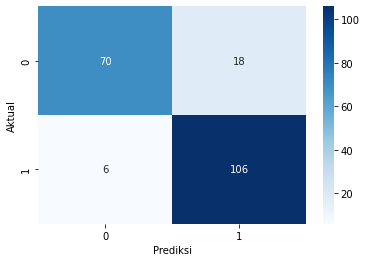

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari Confusion Matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Menampilkan plot
plt.show()